In [1]:
library(tidyverse)
library(readr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [16]:
set.seed(1)

import_ad_data <- read_csv("Data/ad.data.csv", col_names = FALSE, col_select = c("X1", "X2", "X3", "X1560", "X1559"), n_max = 1000)
ad_data <- rename(import_ad_data, Height = X1, Width = X2, Ratio = X3, Attributes = X1560, Type = X1559) |>
           filter(Height != "?" , Width != "?" , Ratio != "?")

total_type <- ad_data |>
              group_by(Type) |>
              summarize(n = n())
total_type

ad_factored <- ad_data |>
               mutate(Height = as.numeric(Height),
                      Width = as.numeric(Width),
                      Ratio = as.numeric(Ratio),
                      Type = as_factor(Type))

ad_data_recipe <- recipe(Type ~ Height + Width + Ratio + Attributes, data = ad_factored) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors()) |> 
                  prep()

ad_data_standardized <- bake(ad_data_recipe, ad_factored)

ad_split <- initial_split(type_factor, prop = 0.87, strata = Type)
ad_train <- training(ad_split)
ad_test <- testing(ad_split) 
glimpse(ad_train)
glimpse(ad_test)

data_proportions_train <- ad_train |>
                    group_by(Type) |>
                    summarize(n = n()) |>
                    mutate(percent = 100*n/nrow(ad_train))
data_proportions_train

data_proportions_test <- ad_test |>
                         group_by(Type) |>
                         summarize(n = n()) |>
                         mutate(percent = 100*n/nrow(ad_test))
data_proportions_test

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): X1, X2, X3, X1559
dbl (1): X1560

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Type,n
<chr>,<int>
ad.,386
nonad.,370


Rows: 656
Columns: 5
$ Height     <dbl> 125, 57, 33, 60, 60, 60, 90, 90, 90, 33, 60, 60, 125, 60, 3…
$ Width      <dbl> 125, 468, 230, 468, 468, 468, 52, 60, 60, 230, 468, 468, 12…
$ Ratio      <dbl> 1.0000, 8.2105, 6.9696, 7.8000, 7.8000, 7.8000, 0.5777, 0.6…
$ Attributes <dbl> 14, 11, 22, 26, 24, 23, 34, 33, 30, 22, 28, 48, 27, 27, 10,…
$ Type       <fct> ad., ad., ad., ad., ad., ad., ad., ad., ad., ad., ad., ad.,…
Rows: 100
Columns: 5
$ Height     <dbl> 60, 59, 60, 60, 90, 60, 60, 125, 125, 60, 60, 60, 60, 100, …
$ Width      <dbl> 468, 460, 234, 468, 60, 468, 468, 125, 125, 468, 234, 468, …
$ Ratio      <dbl> 7.8000, 7.7966, 3.9000, 7.8000, 0.6666, 7.8000, 7.8000, 1.0…
$ Attributes <dbl> 24, 27, 31, 24, 31, 46, 69, 58, 53, 44, 31, 25, 36, 9, 4, 6…
$ Type       <fct> ad., ad., ad., ad., ad., ad., ad., ad., ad., ad., ad., ad.,…


Type,n,percent
<fct>,<int>,<dbl>
ad.,335,51.06707
nonad.,321,48.93293


Type,n,percent
<fct>,<int>,<dbl>
ad.,51,51
nonad.,49,49


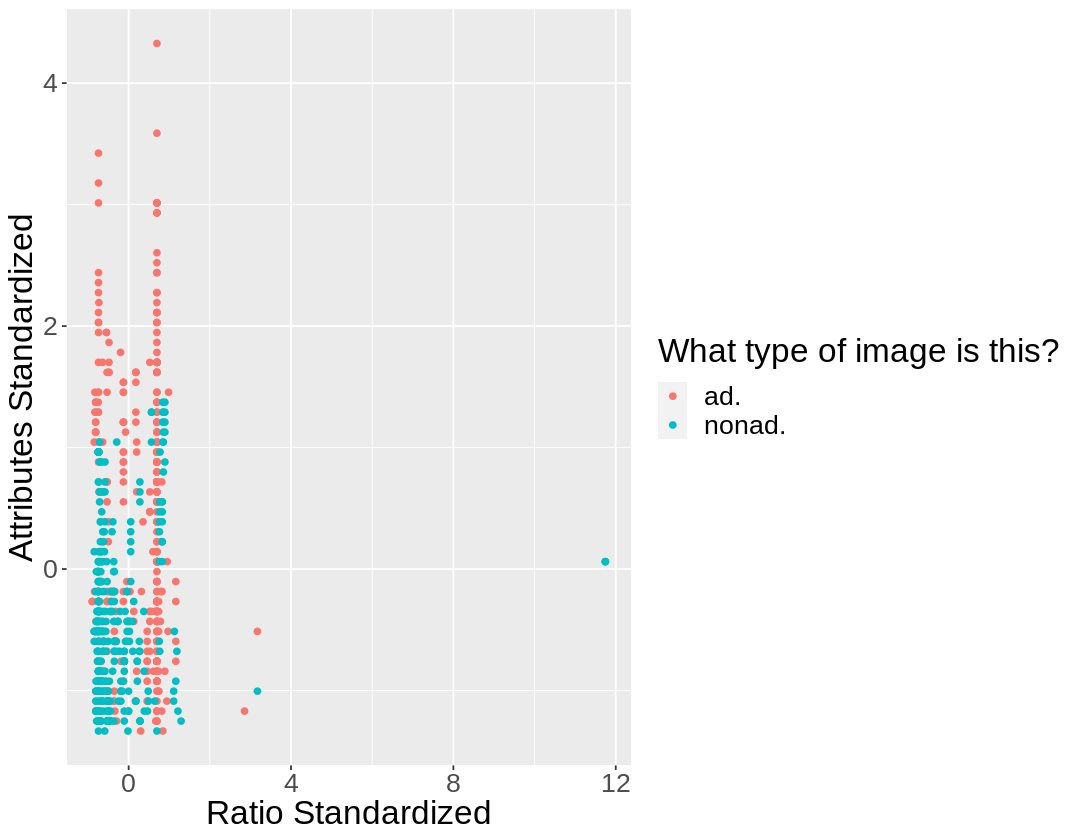

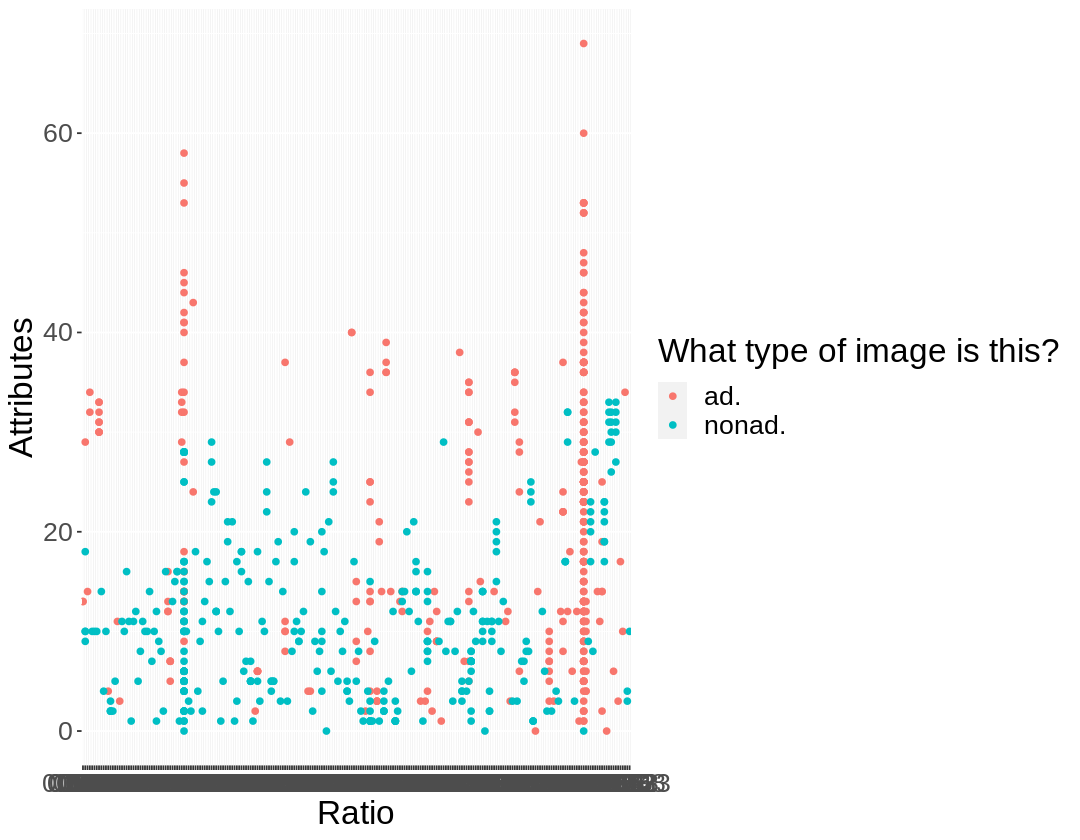

In [21]:
# Plot to see the relationship between ratio and attributes to type

options(repr.plot.width = 9, repr.plot.height = 7)
ad_plot <- ad_data_standardized |>
           ggplot(aes(x = Ratio, y = Attributes, color = Type)) + 
           geom_point()  + 
           xlab("Ratio Standardized") + 
           ylab("Attributes Standardized") +
           labs(colour = "What type of image is this?") +
           theme(text = element_text(size=20)) 
    
ad_plot

options(repr.plot.width = 9, repr.plot.height = 7)
ad_plot2 <- ad_data |>
           ggplot(aes(x = Ratio, y = Attributes, color = Type)) + 
           geom_point()  + 
           xlab("Ratio") + 
           ylab("Attributes") +
           labs(colour = "What type of image is this?") +
           theme(text = element_text(size=20)) 
    
ad_plot2

In [3]:
# Do the training here with ad_train
